In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
data = pd.read_csv(filepath_or_buffer='data/cars.csv')
data.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [121]:
df = data

In [122]:
df.describe()

,Year,Mileage,Price
count,144867.000000,55914.000000,1.409560e+05
mean,2021.374716,52720.606485,5.267889e+04
std,3.995397,44014.784892,4.221504e+04
min,1959.000000,0.000000,1.000000e+00
25%,2021.000000,20116.000000,3.211000e+04
50%,2023.000000,41417.500000,4.707200e+04
75%,2024.000000,73590.750000,6.531125e+04
max,2024.000000,419096.000000,8.078160e+06


In [123]:
df.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [125]:
df[df['Status'] == 'Used'].isna().sum()

Brand       0
Model       0
Year        0
Status      0
Mileage     2
Dealer      0
Price      10
dtype: int64

In [126]:
# Replace NaN Mileage with 0 for New cars
df.loc[(df['Status'] == 'New') & (df['Mileage'].isna()), 'Mileage'] = 0
df

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,0.0,NaN,36703.0
1,Kia,Sportage,2023,New,0.0,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,0.0,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0
...,...,...,...,...,...,...,...
144862,Chevrolet,Corvette,2023,New,0.0,Chase Chevrolet,122455.0
144863,Chevrolet,Corvette,2023,New,0.0,Chase Chevrolet,125930.0
144864,Jeep,Wrangler,2023,New,0.0,Stockton Dodge Chrysler Jeep RAM,53715.0
144865,Jeep,Wrangler,2023,New,0.0,Stockton Dodge Chrysler Jeep RAM,91450.0


In [172]:
avg_price = df.groupby(['Brand','Model', 'Status'])[['Price']].mean().reset_index()
avg_price

,Brand,Model,Status,Price
0,Acura,ILX,Certified,25269.500000
1,Acura,ILX,New,32845.000000
2,Acura,ILX,Used,21706.642857
3,Acura,Integra,Certified,32790.424242
4,Acura,Integra,New,40695.236686
...,...,...,...,...
1448,Volvo,XC60,Used,30347.660714
1449,Volvo,XC70,Used,13332.733333
1450,Volvo,XC90,Certified,44420.118644
1451,Volvo,XC90,New,69616.711765


In [170]:
df[df['Price'].isna() == True]

,Brand,Model,Year,Status,Mileage,Dealer,Price
15,Cadillac,XT5,2024,New,0.0,Navarre Chevrolet Cadillac,NaN
33,Ford,Maverick,2022,New,0.0,Planet Ford 59,NaN
34,Ford,Maverick,2022,New,0.0,Planet Ford 59,NaN
53,Cadillac,CT5,2024,New,0.0,Big Star Cadillac,NaN
276,Ford,F-250,2023,New,0.0,Shetler-Corley Motors,NaN
...,...,...,...,...,...,...,...
144737,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,NaN
144740,Toyota,Camry,2023,New,0.0,Atlantic Toyota,NaN
144741,Toyota,Camry,2023,New,0.0,Atlantic Toyota,NaN
144814,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,NaN


In [179]:
imputed_price = df[df['Price'].isna() == True].merge(right=avg_price, how='left', on=['Brand', 'Model', 'Status'])
imputed_price = imputed_price.drop(columns='Price_x')
imputed_price = imputed_price.rename(columns={'Price_y':'Price'})
imputed_price

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Cadillac,XT5,2024,New,0.0,Navarre Chevrolet Cadillac,56618.737288
1,Ford,Maverick,2022,New,0.0,Planet Ford 59,34174.893584
2,Ford,Maverick,2022,New,0.0,Planet Ford 59,34174.893584
3,Cadillac,CT5,2024,New,0.0,Big Star Cadillac,71350.641667
4,Ford,F-250,2023,New,0.0,Shetler-Corley Motors,74250.534156
...,...,...,...,...,...,...,...
3906,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,50476.979185
3907,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3908,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3909,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,34165.626984


In [182]:
df = pd.concat([df[df['Price'].isna() == False], imputed_price])
df

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,0.0,NaN,36703.000000
1,Kia,Sportage,2023,New,0.0,Classic Kia,28990.000000
2,Chevrolet,Camaro,2024,New,0.0,Classic Chevrolet Beaumont,41425.000000
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.000000
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.000000
...,...,...,...,...,...,...,...
3906,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,50476.979185
3907,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3908,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3909,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,34165.626984


In [230]:
df = df.rename(columns={'Price':'Current Price'})

In [231]:
df.isna().sum()

Brand              0
Model              0
Year               0
Status             0
Mileage            2
Dealer           328
Current Price      0
dtype: int64

In [233]:
toyota = df[df['Brand'] == 'Toyota']

In [234]:
toyota_4runner = toyota[toyota['Model'] == '4Runner']

In [235]:
toyota_4runner

,Brand,Model,Year,Status,Mileage,Dealer,Current Price
36,Toyota,4Runner,2023,New,0.0,Tejas Toyota,49521.000000
37,Toyota,4Runner,2023,New,0.0,Tejas Toyota,50342.000000
461,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,41524.000000
465,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,51016.000000
469,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,44584.000000
...,...,...,...,...,...,...,...
3519,Toyota,4Runner,2022,New,0.0,Elgin Toyota,49955.651188
3579,Toyota,4Runner,2022,New,0.0,Elgin Toyota,49955.651188
3688,Toyota,4Runner,2023,New,0.0,Treasure Coast Toyota of Stuart,49955.651188
3726,Toyota,4Runner,2023,New,0.0,Autoland Toyota/Chrysler/Jeep/Dodge,49955.651188


In [236]:
toyota_4runner.value_counts('Year')

Year
2023    979
2022    231
2021    204
2020    104
2024     90
2019     75
2018     67
2016     53
2017     36
2015     21
2014     20
2011     13
2012      7
2013      6
2007      4
2004      4
2005      3
2008      3
2010      2
2006      2
2002      1
2009      1
Name: count, dtype: int64

In [238]:
len(toyota_4runner[toyota_4runner['Status'] == 'New'])

983

In [240]:
used_toyota_4runner

,Brand,Model,Year,Status,Mileage,Dealer,Current Price,Price_Mile
761,Toyota,4Runner,2019,Used,124717.0,Northshore Toyota,28695.0,0.230081
801,Toyota,4Runner,2021,Used,14181.0,Cowboy Toyota,52318.0,3.689303
897,Toyota,4Runner,2020,Used,30642.0,Sewell Lexus of Dallas,45998.0,1.501142
898,Toyota,4Runner,2017,Used,23974.0,Sewell Lexus of Dallas,32998.0,1.376408
911,Toyota,4Runner,2011,Used,276070.0,Bluebonnet Chrysler Dodge RAM,11611.0,0.042058
...,...,...,...,...,...,...,...,...
143678,Toyota,4Runner,2020,Used,72526.0,Valley Cadillac,32998.0,0.454982
143850,Toyota,4Runner,2019,Used,47053.0,Bell Mitsubishi,35199.0,0.748071
143889,Toyota,4Runner,2018,Used,97931.0,Lynnes Nissan,28172.0,0.287672
144375,Toyota,4Runner,2012,Used,124584.0,Gale Toyota,19799.0,0.158921


In [242]:
used_toyota_4runner = toyota_4runner[toyota_4runner['Status'] == 'Used']
used_toyota_4runner['Price_Mile'] = used_toyota_4runner['Current Price'] / used_toyota_4runner['Mileage']
avg_price_mile = used_toyota_4runner['Price_Mile'].mean()
avg_price_mile = round(avg_price_mile, 2)

/var/folders/gg/ydyvqhls1lzggjy_z1wmnm0m0000gp/T/ipykernel_46771/3523725493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_toyota_4runner['Price_Mile'] = used_toyota_4runner['Current Price'] / used_toyota_4runner['Mileage']


<Axes: xlabel='Price', ylabel='Count'>

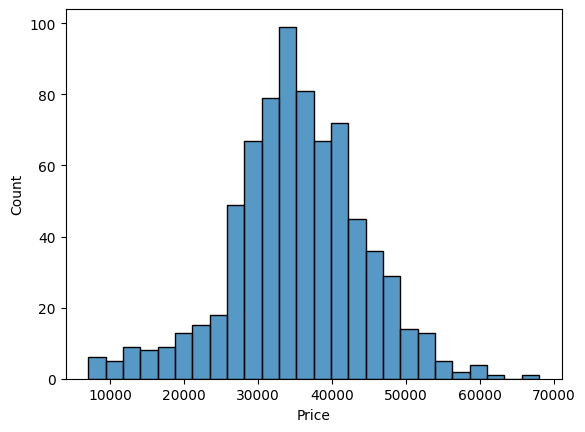

In [193]:
sns.histplot(data=toyota_4runner[toyota_4runner['Status'] == 'Used'], x='Price')

<Axes: xlabel='Mileage', ylabel='Count'>

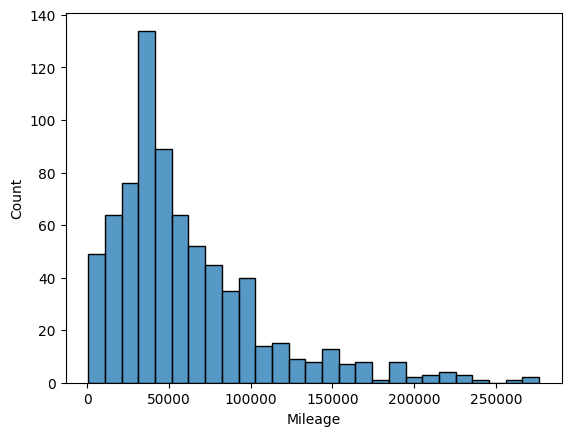

In [194]:
sns.histplot(data=toyota_4runner[toyota_4runner['Status'] == 'Used'], x='Mileage')